In [1]:
import pandas as pd
import numpy as np
import math

Записи на англ. - выписки из книги https://upload.wikimedia.org/wikipedia/commons/3/31/Why%2C_and_How%2C_Should_Geologists_Use_Compositional_Data_Analysis.pdf

Я шла за книгой и повторяла анализ. В книге трансформации делаются в CoDaPack, компонентный анализ в SYSTAT SPSS 10

## Case 1

In [2]:
df = pd.read_excel("data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 20 columns):
Sample      30 non-null int64
Easting     30 non-null float64
Northing    30 non-null int64
SiO2        30 non-null float64
TiO2        30 non-null float64
Al203       30 non-null float64
Fe2O3       30 non-null float64
MgO         30 non-null float64
CaO         30 non-null float64
K2O         30 non-null float64
Na2O        30 non-null float64
P2O5        30 non-null float64
Cu          30 non-null float64
As          30 non-null float64
Pb          30 non-null float64
Co          30 non-null float64
Ni          30 non-null float64
Sc          30 non-null float64
L.O.I.      30 non-null float64
Other       30 non-null float64
dtypes: float64(18), int64(2)
memory usage: 4.7 KB


In [3]:
df

,Sample,Easting,Northing,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
0,259021,845962.7,833189,56.00,2.20,6.00,3.62,5.11,2.08,5.03,7.08,3.00,0.00191,0.00199,0.00002,0.00002,0.00002,0.01936,6.19,9.88
1,259022,831978.5,859092,57.00,1.25,4.00,2.54,5.40,2.19,5.08,7.19,3.74,0.00190,0.00198,0.00003,0.00004,0.00005,0.01763,8.16,11.61
2,259023,857644.3,846310,55.00,2.05,7.00,3.86,5.55,2.29,5.19,7.29,3.46,0.00188,0.00196,0.00003,0.00010,0.00012,0.02056,5.09,8.31
3,259024,840369.6,833920,62.00,2.19,0.00,2.47,5.63,2.29,5.29,7.29,3.80,0.00182,0.00190,0.00006,0.00014,0.00017,0.00013,5.97,9.03
4,259025,833367.4,857854,56.04,1.14,6.00,3.66,5.69,2.43,5.29,7.43,3.14,0.00171,0.00179,0.00006,0.00015,0.00018,0.01834,6.60,9.18
5,259026,841526.8,837288,58.36,1.48,2.00,2.75,5.89,2.45,5.43,7.45,3.70,0.00168,0.00176,0.00004,0.00022,0.00026,0.01058,8.01,10.48
6,259027,850152.3,854634,61.00,1.60,1.00,2.26,5.95,2.49,5.45,7.49,3.17,0.00158,0.00166,0.00005,0.00023,0.00027,0.00341,7.40,9.59
7,259028,836406.1,847121,57.34,1.58,4.02,2.94,6.25,2.54,5.49,7.54,3.26,0.00156,0.00164,0.00003,0.00025,0.00030,0.01372,6.97,9.03
8,259029,893494.7,891521,62.00,1.25,0.66,2.21,6.28,2.55,5.54,7.55,3.08,0.00138,0.00146,0.00005,0.00027,0.00032,0.00035,7.00,8.88
9,259030,898079.8,900849,61.00,1.60,1.85,3.19,6.44,2.60,5.55,7.60,3.96,0.00115,0.00123,0.00002,0.00027,0.00033,0.00085,4.00,6.22


The initial data respond to the following pre-established conditions:
1. Is a close system, meaning that the sum of all the values is equal or very close to 100%
2. There are no zero values present.
3. There are no statistical outliers (hurricane values) present.
4. There is a big difference between the concentRations of the major oxides with respect to the trace elements.

In [4]:
df.iloc[:,3:].kurtosis()

SiO2      -0.328063
TiO2      -1.015560
Al203     -0.427229
Fe2O3     -1.428222
MgO       -1.254478
CaO        0.684264
K2O       -1.146026
Na2O      17.499741
P2O5      -1.327491
Cu        -1.146026
As        -1.145425
Pb        -0.830305
Co        -1.140823
Ni        -1.145651
Sc        -0.551768
L.O.I.    -1.475862
Other     -0.555074
dtype: float64

In [5]:
df.iloc[:,3:].skew()

SiO2     -0.101223
TiO2      0.407565
Al203     0.466588
Fe2O3     0.061671
MgO      -0.041263
CaO      -0.392500
K2O       0.350868
Na2O     -3.679528
P2O5     -0.253403
Cu        0.350868
As        0.353299
Pb       -0.204292
Co        0.358807
Ni        0.357739
Sc        0.585633
L.O.I.    0.033345
Other     0.331463
dtype: float64

In [6]:
df.iloc[:,3:].corr()

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
SiO2,1.000000,0.015916,-0.821159,-0.530176,-0.301095,-0.359345,-0.350280,-0.224870,-0.089746,0.271367,0.269987,0.408814,-0.352142,-0.354746,-0.576152,0.359732,0.241606
TiO2,0.015916,1.000000,-0.066591,0.103272,-0.208066,0.047366,-0.190451,0.184391,-0.043589,0.239428,0.238693,-0.005954,-0.189861,-0.190571,-0.050787,-0.055944,-0.101614
Al203,-0.821159,-0.066591,1.000000,0.413764,0.008052,0.153725,0.044432,0.159204,-0.210804,0.008506,0.009620,-0.382608,0.046110,0.049196,0.795746,-0.245267,-0.180442
Fe2O3,-0.530176,0.103272,0.413764,1.000000,0.031144,0.006618,0.033905,-0.016339,0.098319,-0.065365,-0.064356,-0.215240,0.033413,0.036980,0.310782,-0.159389,-0.093713
MgO,-0.301095,-0.208066,0.008052,0.031144,1.000000,0.616662,0.975460,0.150903,0.345405,-0.976821,-0.976755,-0.097228,0.975308,0.975094,-0.467096,-0.773304,-0.638729
CaO,-0.359345,0.047366,0.153725,0.006618,0.616662,1.000000,0.632005,0.864663,0.248518,-0.603264,-0.603308,-0.247724,0.629343,0.630908,-0.215481,-0.847872,-0.913786
K2O,-0.350280,-0.190451,0.044432,0.033905,0.975460,0.632005,1.000000,0.159900,0.361176,-0.943088,-0.942755,-0.110163,0.999927,0.999962,-0.459098,-0.762321,-0.630047
Na2O,-0.224870,0.184391,0.159204,-0.016339,0.150903,0.864663,0.159900,1.000000,0.095827,-0.157380,-0.157569,-0.251719,0.156340,0.158380,0.008786,-0.584733,-0.757151
P2O5,-0.089746,-0.043589,-0.210804,0.098319,0.345405,0.248518,0.361176,0.095827,1.000000,-0.340214,-0.339846,0.086116,0.357739,0.360139,-0.323296,-0.326529,-0.243831
Cu,0.271367,0.239428,0.008506,-0.065365,-0.976821,-0.603264,-0.943088,-0.157380,-0.340214,1.000000,0.999991,0.176413,-0.941988,-0.942274,0.474163,0.758102,0.637694


To determine the significance of the obtained correlations, I then proceeded to calculate the critical value of Student using equation 3:
t_cr = r / sqrt(1 - r^2) * sqrt(n - 2)
Where,
t_cr - critical value of Student;
r - correlation;
n - amount of data

In [7]:
n = len(df.index)
r = df.iloc[:,3:].corr()
temp = 1-r.pow(2)            # (1 - r^2)
temp = temp.pow(0.5)         # sqrt(1 - r^2)
temp = r.div(temp)           # r / sqrt(1 - r^2)
t_cr = temp.mul( math.sqrt(n-2) )    # r / sqrt(1 - r^2) * sqrt(n - 2)
t_cr

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
SiO2,inf,0.084230,-7.613756,-3.308729,-1.670781,-2.037578,-1.978879,-1.221173,-0.476813,1.491923,1.483739,2.370369,-1.990881,-2.007717,-3.730025,2.040098,1.317491
TiO2,0.084230,inf,-0.353148,0.549402,-1.125618,0.250917,-1.026559,0.992728,-0.230872,1.304885,1.300639,-0.031505,-1.023264,-1.027235,-0.269089,-0.296493,-0.540486
Al203,-7.613756,-0.353148,inf,2.404954,0.042611,0.823222,0.235344,0.853312,-1.141113,0.045009,0.050908,-2.191303,0.244251,0.260637,6.952572,-1.338720,-0.970742
Fe2O3,-3.308729,0.549402,2.404954,inf,0.164880,0.035018,0.179511,-0.086467,0.522787,-0.346622,-0.341247,-1.166281,0.176904,0.195812,1.730179,-0.854326,-0.498073
MgO,-1.670781,-1.125618,0.042611,0.164880,inf,4.145013,23.443423,0.807754,1.947580,-24.147159,-24.111548,-0.516933,23.367993,23.263549,-2.795316,-6.453806,-4.392638
CaO,-2.037578,0.250917,0.823222,0.035018,4.145013,inf,4.315369,9.107887,1.357627,-4.002513,-4.002973,-1.353003,4.285233,4.302917,-1.167648,-8.461923,-11.903894
K2O,-1.978879,-1.026559,0.235344,0.179511,23.443423,4.315369,inf,0.857137,2.049507,-15.006665,-14.958979,-0.586497,436.599439,606.922899,-2.734532,-6.232743,-4.293175
Na2O,-1.221173,0.992728,0.853312,-0.086467,0.807754,9.107887,0.857137,inf,0.509415,-0.843284,-0.844326,-1.376288,0.837573,0.848779,0.046492,-3.814129,-6.133228
P2O5,-0.476813,-0.230872,-1.141113,0.522787,1.947580,1.357627,2.049507,0.509415,inf,-1.914442,-1.912102,0.457384,2.027129,2.042749,-1.807804,-1.828031,-1.330388
Cu,1.491923,1.304885,0.045009,-0.346622,-24.147159,-4.002513,-15.006665,-0.843284,-1.914442,inf,1235.155360,0.948363,-14.850509,-14.890720,2.849758,6.151314,4.380636


It is a common practice in geology that for n > 30 and a probability of 0.05 (95%), if tc > 3, then the correlation is significant.

In [8]:
r_significant = r.where(t_cr > 3)
r_significant = r_significant.where(r_significant < 1) # без 1 на гл диагонали
r_significant.dropna(axis=1, how='all', inplace=True)
r_significant.dropna(axis=0, how='all', inplace=True)
r_significant

,Al203,MgO,CaO,K2O,Na2O,Cu,As,Co,Ni,Sc,L.O.I.,Other
Al203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795746,NaN,NaN
MgO,NaN,NaN,0.616662,0.975460,NaN,NaN,NaN,0.975308,0.975094,NaN,NaN,NaN
CaO,NaN,0.616662,NaN,0.632005,0.864663,NaN,NaN,0.629343,0.630908,NaN,NaN,NaN
K2O,NaN,0.975460,0.632005,NaN,NaN,NaN,NaN,0.999927,0.999962,NaN,NaN,NaN
Na2O,NaN,NaN,0.864663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cu,NaN,NaN,NaN,NaN,NaN,NaN,0.999991,NaN,NaN,NaN,0.758102,0.637694
As,NaN,NaN,NaN,NaN,NaN,0.999991,NaN,NaN,NaN,NaN,0.758330,0.637953
Co,NaN,0.975308,0.629343,0.999927,NaN,NaN,NaN,NaN,0.999950,NaN,NaN,NaN
Ni,NaN,0.975094,0.630908,0.999962,NaN,NaN,NaN,0.999950,NaN,NaN,NaN,NaN
Sc,0.795746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
d = {}
for i in r_significant.index:
    for j in r_significant.index:
        if (not math.isnan(r_significant.loc[i,j])):
            d[r_significant.loc[i,j]] = {i, j}
rs = pd.DataFrame.from_dict(d, orient='index')
rs = rs.reset_index()
rs = rs.rename(index=str, columns={"index": "correlation"})
rs.sort_values("correlation", ascending=False)

,correlation,0,1
11,0.999991,Cu,As
10,0.999962,K2O,Ni
16,0.999950,Co,Ni
9,0.999927,Co,K2O
2,0.975460,MgO,K2O
3,0.975308,Co,MgO
4,0.975094,MgO,Ni
17,0.947308,Other,L.O.I.
6,0.864663,Na2O,CaO
0,0.795746,Al203,Sc


## divide major and trace elements

Делим элементы на major (от SiO2 до P2O5 и L.O.I) и trace (остальные).

Major:

In [10]:
r_major = df.iloc[:,np.r_[3:12, 18]].corr()
r_major

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,L.O.I.
SiO2,1.000000,0.015916,-0.821159,-0.530176,-0.301095,-0.359345,-0.350280,-0.224870,-0.089746,0.359732
TiO2,0.015916,1.000000,-0.066591,0.103272,-0.208066,0.047366,-0.190451,0.184391,-0.043589,-0.055944
Al203,-0.821159,-0.066591,1.000000,0.413764,0.008052,0.153725,0.044432,0.159204,-0.210804,-0.245267
Fe2O3,-0.530176,0.103272,0.413764,1.000000,0.031144,0.006618,0.033905,-0.016339,0.098319,-0.159389
MgO,-0.301095,-0.208066,0.008052,0.031144,1.000000,0.616662,0.975460,0.150903,0.345405,-0.773304
CaO,-0.359345,0.047366,0.153725,0.006618,0.616662,1.000000,0.632005,0.864663,0.248518,-0.847872
K2O,-0.350280,-0.190451,0.044432,0.033905,0.975460,0.632005,1.000000,0.159900,0.361176,-0.762321
Na2O,-0.224870,0.184391,0.159204,-0.016339,0.150903,0.864663,0.159900,1.000000,0.095827,-0.584733
P2O5,-0.089746,-0.043589,-0.210804,0.098319,0.345405,0.248518,0.361176,0.095827,1.000000,-0.326529
L.O.I.,0.359732,-0.055944,-0.245267,-0.159389,-0.773304,-0.847872,-0.762321,-0.584733,-0.326529,1.000000


In [11]:
t_major = t_cr.iloc[np.r_[:9, 15], np.r_[:9, 15]]
t_major

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,L.O.I.
SiO2,inf,0.084230,-7.613756,-3.308729,-1.670781,-2.037578,-1.978879,-1.221173,-0.476813,2.040098
TiO2,0.084230,inf,-0.353148,0.549402,-1.125618,0.250917,-1.026559,0.992728,-0.230872,-0.296493
Al203,-7.613756,-0.353148,inf,2.404954,0.042611,0.823222,0.235344,0.853312,-1.141113,-1.338720
Fe2O3,-3.308729,0.549402,2.404954,inf,0.164880,0.035018,0.179511,-0.086467,0.522787,-0.854326
MgO,-1.670781,-1.125618,0.042611,0.164880,inf,4.145013,23.443423,0.807754,1.947580,-6.453806
CaO,-2.037578,0.250917,0.823222,0.035018,4.145013,inf,4.315369,9.107887,1.357627,-8.461923
K2O,-1.978879,-1.026559,0.235344,0.179511,23.443423,4.315369,inf,0.857137,2.049507,-6.232743
Na2O,-1.221173,0.992728,0.853312,-0.086467,0.807754,9.107887,0.857137,inf,0.509415,-3.814129
P2O5,-0.476813,-0.230872,-1.141113,0.522787,1.947580,1.357627,2.049507,0.509415,inf,-1.828031
L.O.I.,2.040098,-0.296493,-1.338720,-0.854326,-6.453806,-8.461923,-6.232743,-3.814129,-1.828031,inf


In [12]:
r_sign_major = r_major.where(t_major > 3)
r_sign_major = r_sign_major.where(r_sign_major < 1) # без 1 на гл диагонали
r_sign_major.dropna(axis=1, how='all', inplace=True)
r_sign_major.dropna(axis=0, how='all', inplace=True)

d = {}
for i in r_sign_major.index:
    for j in r_sign_major.index:
        if (not math.isnan(r_sign_major.loc[i,j])):
            d[r_sign_major.loc[i,j]] = {i, j}
rs_major = pd.DataFrame.from_dict(d, orient='index')
rs_major = rs_major.reset_index()
rs_major = rs_major.rename(index=str, columns={"index": "correlation"})
rs_major.sort_values("correlation", ascending=False)

,correlation,0,1
1,0.975460,MgO,K2O
3,0.864663,Na2O,CaO
2,0.632005,CaO,K2O
0,0.616662,MgO,CaO


Trace:

In [13]:
r_trace = df.iloc[:,12:18].corr()
r_trace

,Cu,As,Pb,Co,Ni,Sc
Cu,1.000000,0.999991,0.176413,-0.941988,-0.942274,0.474163
As,0.999991,1.000000,0.175558,-0.941662,-0.941938,0.475232
Pb,0.176413,0.175558,1.000000,-0.108800,-0.111870,-0.266988
Co,-0.941988,-0.941662,-0.108800,1.000000,0.999950,-0.456034
Ni,-0.942274,-0.941938,-0.111870,0.999950,1.000000,-0.454618
Sc,0.474163,0.475232,-0.266988,-0.456034,-0.454618,1.000000


In [14]:
t_trace = t_cr.iloc[9:15, 9:15]
t_trace

,Cu,As,Pb,Co,Ni,Sc
Cu,inf,1235.155360,0.948363,-14.850509,-14.890720,2.849758
As,1235.155360,inf,0.943623,-14.805130,-14.843511,2.858054
Pb,0.948363,0.943623,inf,-0.579155,-0.595700,-1.465985
Co,-14.850509,-14.805130,-0.579155,inf,529.253676,-2.711472
Ni,-14.890720,-14.843511,-0.595700,529.253676,inf,-2.700854
Sc,2.849758,2.858054,-1.465985,-2.711472,-2.700854,inf


In [15]:
r_sign_trace = r_trace.where(t_trace > 3)
r_sign_trace = r_sign_trace.where(r_sign_trace < 1) # без 1 на гл диагонали
r_sign_trace.dropna(axis=1, how='all', inplace=True)
r_sign_trace.dropna(axis=0, how='all', inplace=True)

d = {}
for i in r_sign_trace.index:
    for j in r_sign_trace.index:
        if (not math.isnan(r_sign_trace.loc[i,j])):
            d[r_sign_trace.loc[i,j]] = {i, j}
rs_trace = pd.DataFrame.from_dict(d, orient='index')
rs_trace = rs_trace.reset_index()
rs_trace = rs_trace.rename(index=str, columns={"index": "correlation"})
rs_trace.sort_values("correlation", ascending=False)

,correlation,0,1
0,0.999991,Cu,As
1,0.999950,Co,Ni


Closed systems do provoke spurious correlations that mask the effectiveness of the established RCC. This is especially true when processing datasets that contain a combination of major oxides and trace elements. In those cases, I recommend to use only the extremely intense correlations.
A more useful solution is to separate major oxides from trace elements, and concentrate again only on the intense correlations. The disadvantage here is that we do not use the combine information of both groups of elements.

## Centered Log-Ratio Transformation (CLR)

http://www.compositionaldata.com/material/others/Lecture_notes_11.pdf   стр. 23, формула 4.3

clr(x) = [ ln(x1) / g(x) ; ln(x2) / g(x) ; ... ; ln(xn) / g(x)] , где g(x) - геометрическая средняя.

In [16]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def clr( df ):
   "Centered Log-Ratio Tramsformation of a dataframe"
   for col in range(len(df.columns)):
        gmean = stats.gmean(df.iloc[:,col])
        for row in range(len(df.index)):
            df.iloc[row,col] = np.log(df.iloc[row,col]) / gmean
   return df

In [17]:
df_clr = clr(df.iloc[:,3:])
df_clr

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
0,0.069554,0.528066,inf,0.436858,0.234807,0.260473,0.273462,0.257891,0.311371,-9055.360363,-7608.968160,-351914.122635,-30899.515014,-25868.138070,-836.163291,0.795899,0.343778
1,0.069860,0.149450,inf,0.316542,0.242753,0.278801,0.275136,0.259922,0.373858,-9062.952992,-7615.131304,-338726.338743,-28920.000170,-23677.452222,-856.006082,0.916537,0.367995
2,0.069243,0.480770,inf,0.458657,0.246697,0.294681,0.278762,0.261742,0.351803,-9078.258876,-7627.551526,-338726.338743,-26303.223885,-21584.364400,-823.415186,0.710475,0.317805
3,0.071313,0.525015,-inf,0.307052,0.248757,0.294681,0.281993,0.261742,0.378369,-9125.173017,-7665.587172,-316181.673271,-25342.314276,-20751.625925,-1896.788318,0.780100,0.330276
4,0.069567,0.087756,inf,0.440590,0.250283,0.315786,0.281993,0.264249,0.324298,-9215.345655,-7738.547517,-316181.673271,-25145.281932,-20614.970469,-847.636604,0.823901,0.332749
5,0.070267,0.262569,inf,0.343517,0.255256,0.318701,0.286415,0.264603,0.370811,-9240.946192,-7759.224878,-329369.457163,-24051.518776,-19735.806854,-964.250614,0.908436,0.352626
6,0.071032,0.314783,NaN,0.276880,0.256715,0.324461,0.287037,0.265308,0.326993,-9329.709777,-7830.788049,-322111.695958,-23924.571821,-19645.576538,-1204.265171,0.873853,0.339306
7,0.069963,0.306358,inf,0.366204,0.263795,0.331532,0.288275,0.266185,0.334928,-9348.135409,-7845.617096,-338726.338743,-23686.447600,-19393.678552,-909.159408,0.847716,0.330276
8,0.071313,0.149450,-inf,0.269283,0.264485,0.332929,0.289810,0.266360,0.318830,-9525.466493,-7987.847179,-322111.695958,-23466.659469,-19239.378590,-1686.844005,0.849591,0.327762
9,0.071032,0.314783,inf,0.393917,0.268106,0.339835,0.290115,0.267229,0.390058,-9789.175031,-8197.561990,-351914.122635,-23466.659469,-19165.809105,-1498.753837,0.605261,0.274326


The dataset is now “open”, since the sum of all the components is equal to zero, not 100%.

In [18]:
r_clr = df_clr.corr()
r_clr

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
SiO2,1.000000,0.027745,NaN,-0.512004,-0.270595,-0.289017,-0.334168,-0.153106,-0.090781,0.336290,0.359667,0.368085,-0.109347,-0.104011,-0.632674,0.333490,0.259021
TiO2,0.027745,1.000000,NaN,0.065622,-0.220679,0.130298,-0.204041,0.265529,-0.038390,0.213169,0.203093,0.037580,-0.263363,-0.269768,-0.156380,-0.120747,-0.087649
Al203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe2O3,-0.512004,0.065622,NaN,1.000000,0.009894,-0.036304,0.012217,-0.046552,0.114254,-0.143052,-0.129772,-0.180761,-0.063109,-0.066441,0.306691,-0.007224,-0.043544
MgO,-0.270595,-0.220679,NaN,0.009894,1.000000,0.447692,0.973419,-0.025577,0.341532,-0.865808,-0.922028,-0.107520,0.932025,0.926557,-0.152172,-0.697389,-0.703921
CaO,-0.289017,0.130298,NaN,-0.036304,0.447692,1.000000,0.444240,0.878883,0.173767,-0.063824,-0.203197,-0.234724,0.469971,0.468430,0.111647,-0.678475,-0.832622
K2O,-0.334168,-0.204041,NaN,0.012217,0.973419,0.444240,1.000000,-0.033421,0.355444,-0.890592,-0.939893,-0.120576,0.901348,0.894450,-0.175704,-0.761408,-0.716469
Na2O,-0.153106,0.265529,NaN,-0.046552,-0.025577,0.878883,-0.033421,1.000000,0.018528,0.397615,0.269759,-0.206337,0.035493,0.036978,0.203330,-0.366474,-0.550256
P2O5,-0.090781,-0.038390,NaN,0.114254,0.341532,0.173767,0.355444,0.018528,1.000000,-0.344506,-0.362705,0.156898,0.331698,0.341372,-0.231994,-0.382592,-0.282327
Cu,0.336290,0.213169,NaN,-0.143052,-0.865808,-0.063824,-0.890592,0.397615,-0.344506,1.000000,0.988905,0.075107,-0.745006,-0.737711,0.220752,0.508176,0.393858


In [19]:
n = len(df_clr.index)
temp = 1-r_clr.pow(2)            # (1 - r^2)
temp = temp.pow(0.5)         # sqrt(1 - r^2)
temp = r.div(temp)           # r / sqrt(1 - r^2)
t_clr = temp.mul( math.sqrt(n-2) )    # r / sqrt(1 - r^2) * sqrt(n - 2)
t_clr

,SiO2,TiO2,Al203,Fe2O3,MgO,CaO,K2O,Na2O,P2O5,Cu,As,Pb,Co,Ni,Sc,L.O.I.,Other
SiO2,inf,0.084252,NaN,-3.265989,-1.654989,-1.986242,-1.966558,-1.204094,-0.476858,1.524743,1.531099,2.326585,-1.874599,-1.887377,-3.936772,2.019111,1.323633
TiO2,0.084252,inf,NaN,0.547645,-1.128813,0.252790,-1.029427,1.012035,-0.230823,1.296737,1.289927,-0.031526,-1.041418,-1.047235,-0.272089,-0.298210,-0.539766
Al203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe2O3,-3.265989,0.547645,NaN,inf,0.164808,0.035040,0.179421,-0.086549,0.523683,-0.349475,-0.343443,-1.158021,0.177158,0.196111,1.727765,-0.843427,-0.496352
MgO,-1.654989,-1.128813,NaN,0.164808,inf,3.649200,22.536923,0.798766,1.944645,-10.329930,-13.351077,-0.517484,14.241020,13.716986,-2.500762,-5.709474,-4.758468
CaO,-1.986242,0.252790,NaN,0.035040,3.649200,inf,3.732813,9.591206,1.335350,-3.198693,-3.260424,-1.348505,3.772788,3.778662,-1.147392,-6.107231,-8.730468
K2O,-1.966558,-1.029427,NaN,0.179421,22.536923,3.732813,inf,0.846582,2.044684,-10.972576,-14.609170,-0.587211,12.216960,11.832926,-2.467709,-6.222420,-4.778966
Na2O,-1.204094,1.012035,NaN,-0.086549,0.798766,9.591206,0.846582,inf,0.507158,-0.907605,-0.865879,-1.361265,0.827795,0.838639,0.047482,-3.325478,-4.798187
P2O5,-0.476858,-0.230823,NaN,0.523683,1.944645,1.335350,2.044684,0.507158,inf,-1.917632,-1.929700,0.461399,2.006578,2.027471,-1.758704,-1.870114,-1.344949
Cu,1.524743,1.296737,NaN,-0.349475,-10.329930,-3.198693,-10.972576,-0.907605,-1.917632,inf,35.621040,0.936134,-7.472409,-7.385458,2.572497,4.657743,3.671089


In [20]:
r_sign_clr = r_clr.where(t_clr > 3)
r_sign_clr = r_sign_clr.where(r_sign_clr < 1) # без 1 на гл диагонали
r_sign_clr.dropna(axis=1, how='all', inplace=True)
r_sign_clr.dropna(axis=0, how='all', inplace=True)

d = {}
for i in r_sign_clr.index:
    for j in r_sign_clr.index:
        if (not math.isnan(r_sign_clr.loc[i,j])):
            d[r_sign_clr.loc[i,j]] = {i, j}
rs_clr = pd.DataFrame.from_dict(d, orient='index')
rs_clr = rs_clr.reset_index()
rs_clr = rs_clr.rename(index=str, columns={"index": "correlation"})
rs_clr.sort_values("correlation", ascending=False)

,correlation,0,1
15,0.999452,Co,Ni
10,0.988905,Cu,As
1,0.973419,MgO,K2O
2,0.932025,Co,MgO
3,0.926557,MgO,Ni
16,0.905932,Other,L.O.I.
8,0.901348,Co,K2O
9,0.894450,K2O,Ni
5,0.878883,Na2O,CaO
13,0.596532,L.O.I.,As


One very important effect of “opening” a dataset by using any of these transformations is that we get rid off all spurious correlations. The transformed data do contain unexpected correlations, but they are real. Another important point is that we do not need to process the data separately (e.g. separating major oxides from trace elements), but can process the whole dataset taking advantage of the information contained in both groups.

## Factor Analysis

Factor analysis is a statistical data reduction technique used to explain variability among observed random variables in terms of fewer unobserved random variables called factors. It is useful to reduce the number of variables, by combining two or more variables into a single factor, thus “simplifying” the original dataset. Factor analysis (FA) is especially useful in geochemistry when one has a known target or some other way to understand the meaning of the obtained associations. When failing this, the geologist is usually forced to “plot and see”, and then to select the FA that he believes is the most useful for
the studied area.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

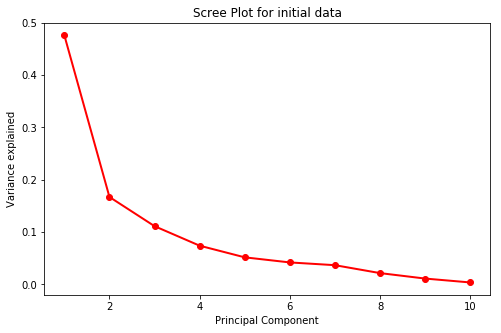

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

#convert df to numpy arrays
X=df.values

#Scaling the values
X = scale(X)
n_comp = 10
pca = PCA(n_components=n_comp)
pca.fit(X)

#The amount of variance that each PC explains
var = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(n_comp) + 1
plt.plot(sing_vals, var, 'ro-', linewidth=2);
plt.title('Scree Plot for initial data')
plt.xlabel('Principal Component')
plt.ylabel('Variance explained');

Scree plot показывает, какую часть дисперсии объясняет каждая новая компонента (фактор). В нашем случае оптимально взять 3.

Можно усложниться и искать оптимальное число как здесь: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-fa-model-selection-py

In [22]:
pca = PCA(n_components=3)
X1=pca.fit(X)

The next question will be: Will the transformed data be any more effective in helping us locate our target?

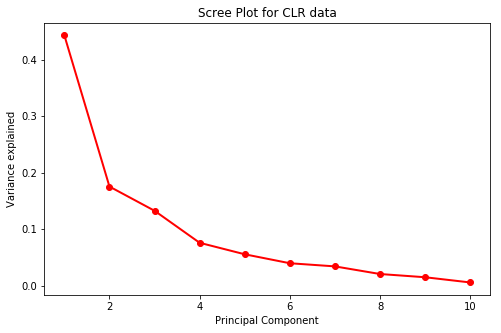

In [23]:
X_clr=df_clr.dropna(axis=1).values

X_clr = scale(X_clr)
n_comp = 10
pca_clr = PCA(n_components=n_comp)
pca_clr.fit(X_clr)

var_clr = pca_clr.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(n_comp) + 1
plt.plot(sing_vals, var_clr, 'ro-', linewidth=2);
plt.title('Scree Plot for CLR data')
plt.xlabel('Principal Component')
plt.ylabel('Variance explained');

In [24]:
pca_clr = PCA(n_components=3)
X2=pca_clr.fit(X_clr)

Как на питоне сделать Component Matrix я не придумала. Это табличка в SPSS: This table contains component loadings, which are the correlations between the variable and the component. (согласно сайту https://stats.idre.ucla.edu/spss/output/principal-components-analysis/ ). В методах PCA от sklearn подобного нет.